<h1>Exploratory Data Analysis</h1>

<p>In this notebook, we take a closer look at our processed data, by deriving ocurrences of ingredients, the most and the least common ones, the average length of ingredients' list of recipes... </p>

<h3>Imports</h3>

In [4]:
!pip install nltk

    100% |████████████████████████████████| 1.4MB 7.0MB/s ta 0:00:011
    100% |████████████████████████████████| 92kB 15.2MB/s ta 0:00:01
    100% |████████████████████████████████| 286kB 12.4MB/s ta 0:00:01
  Running setup.py install for nltk ... done


In [5]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [6]:
import nltk
from nltk.probability import FreqDist
import statistics

## Help functions

In [7]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [8]:
def averageLen(lst):
  lengths = [len(i) for i in lst]
  return 0 if len(lengths) == 0 else (float(sum(lengths)) / len(lengths)) 


## Read Data

In [23]:
recipe_ingredients = pd.read_pickle('processed_ingridients.pkl')
recipe_ingredients_df = pd.DataFrame(recipe_ingredients)
recipe_ingredients_df.head()

recipe_ingredients  \
000018c8a5  [penne, cheese, sauce, cheese, chili_powder, b...   
000033e39b  [macaroni, cheese, celery, green, pepper, pime...   
000035f7ed  [tomatoes, salt, red_onion, green, bell_pepper...   
00003a70b1  [milk, water, butter, mashed_potatoes, corn, c...   
00004320bb  [watermelon, gelatin, boiling_water, cool_whip...   

                                         title  
000018c8a5          Worlds Best Mac and Cheese  
000033e39b         Dilly Macaroni Salad Recipe  
000035f7ed                            Gazpacho  
00003a70b1           Crunchy Onion Potato Bake  
00004320bb  Cool 'n Easy Creamy Watermelon Pie

In [10]:
recipe_ingredients_df.tail()

recipe_ingredients  \
18c5efac25  [butter, shortening, sugar, vanilla, eggs, flo...   
18c5ff5968  [chicken, lettuce, tomatoes, cucumber, cheese,...   
18c6060eb7  [steak, whiskey, garlic, salt, black_pepper, o...   
18c606f28e  [butter, sugar, cayenne_pepper, paprika, coria...   
18c6112dda  [hazelnuts, butter, chocolate, cream, eggs, va...   

                                                        title  
18c5efac25                        Hershey's Disappearing Cake  
18c5ff5968                               Crispy chicken salad  
18c6060eb7                                   Double Jack Stew  
18c606f28e  Blondie's Dad's Take Me Out To The Ballgame Mi...  
18c6112dda               Chocolate Mousse Cake Recipe chowser

In [11]:
len(recipe_ingredients_df.recipe_ingredients)

99999

<h2>Analysis</h2>

<p> AVERAGE LENGTH OF INGREDIENTS LISTS </p>

In [12]:
average_recipe_length = averageLen(recipe_ingredients_df.recipe_ingredients)

In [13]:
average_recipe_length

11.236052360523605

<p>IGREDIENTS' COUNTER</p>

In [14]:
#Get all ingredients in a lit, out of the nested lists
flatten_ingredients_list = flatten(recipe_ingredients_df.recipe_ingredients.tolist())

In [15]:
#Count ingredients' frequencies
ingredient_occurrences = Counter(flatten_ingredients_list)

In [16]:
occurrences = ingredient_occurrences.most_common()

In [18]:
most_common = dict(occurrences[:10])
names = list(most_common.keys())
values = list(most_common.values())

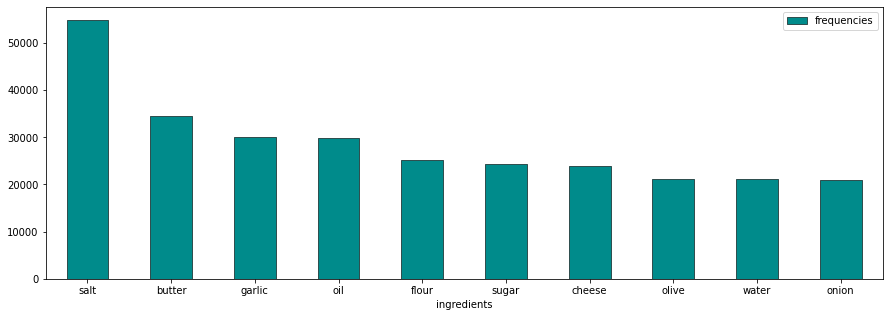

In [19]:
df = pd.DataFrame({'ingredients':names, 'frequencies':values})
ax = df.plot.bar(x='ingredients', y='frequencies', rot=0, color={(0,139/255,139/255)}, edgecolor=(47/255,79/255,79/255), figsize=(15,5))

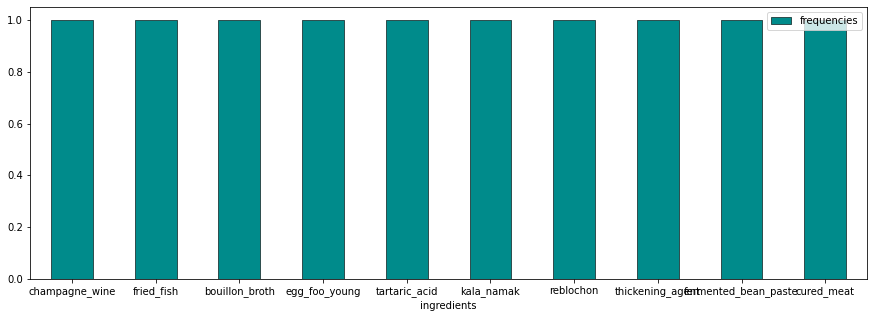

In [20]:
least_common = dict(occurrences[-10:])
names = list(least_common.keys())
values = list(least_common.values())


df = pd.DataFrame({'ingredients':names, 'frequencies':values})
ax = df.plot.bar(x='ingredients', y='frequencies', rot=0, color={(0,139/255,139/255)}, edgecolor=(47/255,79/255,79/255), figsize=(15,5))

<p>FREQUENCY DISTRIBUTION<p/>

In [21]:
ingredients_counter_values = [counter_value for counter_value in ingredient_occurrences.values()]

(array([437.,  99., 112.]),
 array([  0,  35,  75, 155]),
 <BarContainer object of 3 artists>)

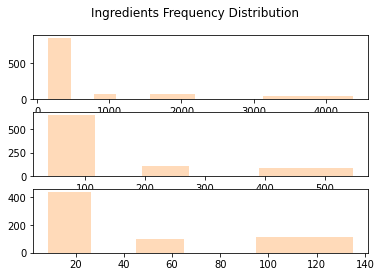

In [22]:
fig, axs = plt.subplots(3)
fig.suptitle('Ingredients Frequency Distribution')
axs[0].hist(ingredients_counter_values, bins=[0, 625, 1250, 2500, 5000], rwidth=0.5, color=(255/255,218/255,185/255))
axs[1].hist(ingredients_counter_values, bins=[0, 155, 312, 625], rwidth=0.5, color=(255/255,218/255,185/255))
axs[2].hist(ingredients_counter_values, bins=[0, 35, 75, 155], rwidth=0.5, color=(255/255,218/255,185/255))